<a href="https://colab.research.google.com/github/rhythmd18/TitanicDataAnalysis_naiveBayes/blob/main/AnalysisOfTitanicData%2BNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Downloaded datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
drop_col = df.isna().sum()[df.isna().sum() > (35/100 * df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [7]:
print(drop_col.index)

Index(['Cabin'], dtype='object')


In [8]:
df = df.drop(columns=drop_col.index)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

<ipython-input-12-80ca06535dfe>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
df['Embarked'].fillna('S', inplace=True)

<ipython-input-15-828b6392ba0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

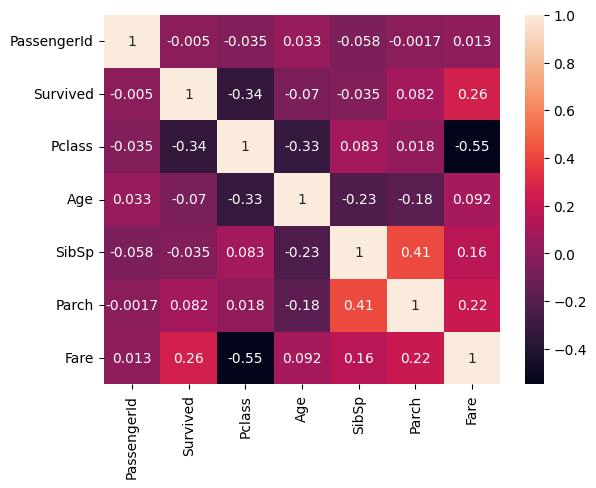

In [15]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

df[['FamilySize', 'Survived']].corr()

,FamilySize,Survived
FamilySize,1.000000,0.016639
Survived,0.016639,1.000000


In [17]:
df['Alone'] = [0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [18]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

If the person os alone he/she has less chance of surviving.

In [19]:
df.groupby(['Alone'])['Fare'].mean()

Alone
0    48.832275
1    21.242689
Name: Fare, dtype: float64

In [20]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

This shows that female passengers had more chance of surviving than male ones.

In [21]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,S,0,1


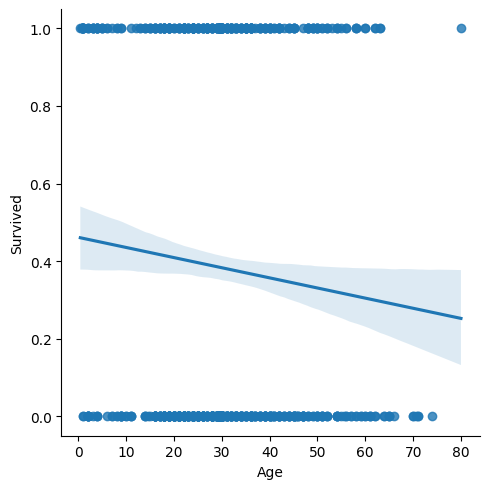

In [23]:
sns.lmplot(data=df, x='Age', y='Survived',)

<Axes: xlabel='Sex', ylabel='Age'>

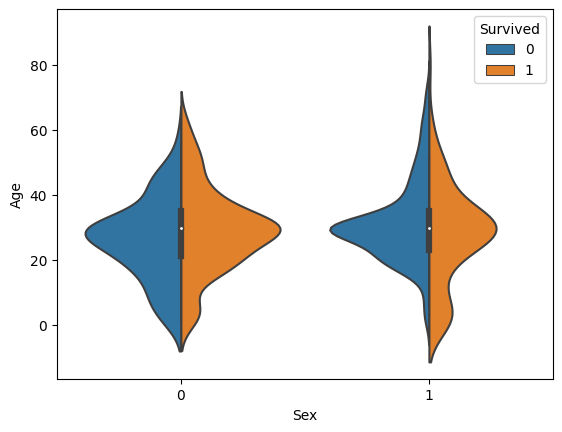

In [24]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

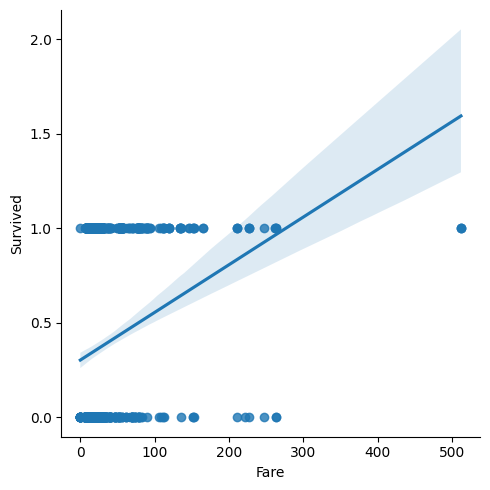

In [25]:
sns.lmplot(x='Fare', y='Survived', data=df)

### Conclusion
<ul>
<li>Female passengers were prioritized over man
<li>People with high class or rich people have higher survival rates than others. The hierarchy might have been followed while saving the passengers.
<li>Passengers travelling with their family have higher survival rate.
<li>Passengers who boarder the ship at Cherbourg, survived more in proportion than the others.
</ul>

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,S,0,1


In [27]:
df = df.drop(columns=['Ticket', 'FamilySize', 'Name'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,1,22.0,7.2500,S,0
1,2,1,1,0,38.0,71.2833,C,0
2,3,1,3,0,26.0,7.9250,S,1
3,4,1,1,0,35.0,53.1000,S,0
4,5,0,3,1,35.0,8.0500,S,1


In [28]:
df.drop(['PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,1,22.0,7.2500,S,0
1,1,1,0,38.0,71.2833,C,0
2,1,3,0,26.0,7.9250,S,1
3,1,1,0,35.0,53.1000,S,0
4,0,3,1,35.0,8.0500,S,1


In [29]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)

ValueError: ignored

In [31]:
new_X = pd.get_dummies(X, prefix_sep='_', columns=['Embarked'])
new_X.head()

,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,7.2500,0,0,0,1
1,1,0,38.0,71.2833,0,1,0,0
2,3,0,26.0,7.9250,1,0,0,1
3,1,0,35.0,53.1000,0,0,0,1
4,3,1,35.0,8.0500,1,0,0,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=0)

In [33]:
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = gnb.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_pred, y_test) * 100:.2f}%')

Accuracy: 77.58%


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_pred, y_test) * 100:.2f}%')

Accuracy: 82.51%


In [38]:
clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=717797141),
 DecisionTreeClassifier(max_features='sqrt', random_state=1230435540),
 DecisionTreeClassifier(max_features='sqrt', random_state=1146992457),
 DecisionTreeClassifier(max_features='sqrt', random_state=808476634),
 DecisionTreeClassifier(max_features='sqrt', random_state=605191991),
 DecisionTreeClassifier(max_features='sqrt', random_state=1562649319),
 DecisionTreeClassifier(max_features='sqrt', random_state=721437824),
 DecisionTreeClassifier(max_features='sqrt', random_state=2031145850),
 DecisionTreeClassifier(max_features='sqrt', random_state=751498264),
 DecisionTreeClassifier(max_features='sqrt', random_state=1959807815),
 DecisionTreeClassifier(max_features='sqrt', random_state=1104236271),
 DecisionTreeClassifier(max_features='sqrt', random_state=518513432),
 DecisionTreeClassifier(max_features='sqrt', random_state=1293411956),
 DecisionTreeClassifier(max_features='sqrt', random_state=724658022),
 DecisionTree

In [39]:
clf.feature_importances_

array([0.09566659, 0.26298613, 0.28767173, 0.288191  , 0.02924843,
       0.01254381, 0.00884441, 0.01484789])